# Credit card fraud detection capstone project

## Table Of Contents: <a class="anchor" id="top"></a>

- [Introduction](#introduction)
- [Packages and the data](#packages)
- [Exploratory data analysis](#eda)
    * [Total amount purchase per month](#LineGraphic)
    * [Total count of transactions](#CountOfTransactions)
    * [Product transaction distribution](#ProductDistribution)
    * [Cards brands distribution](#BrandsDistribution)
    * [Cards Types distribution](#BrandsTDistribution)
    * [Cards brands distribution by transaction type](#DistributionBTType)
    * [Cards distribution by transaction type](#DistributionTType)
    * [Average amount purchase](#AvgAmountPurchase)
    * [Purchase distribution by email address](#DistrByEmailAddress)
- [Handling Missing Values](#HMissingValues)
- [Features correlation](#FeaturesCorrelation)
- [Dummy Variables](#dummyvar)
- [Data balancing](#dataBalancing)
- [Feature Selection](#featureSelection)
- [Fraud Classification](#classification)
    * [Decision Trees models](#decisionTrees)
    * [Random Forests models](#randomForests)
    * [Suport Vector Machines models](#SVM)
    * [AdaBoost model](#AdaBoost)
- [Conclusions](#conclusions)

### Introduction <a class="anchor" id="introduction"></a> 
[TOC](#top)

Fraud can be defined as any deceitful activity that leads to obtaining unlawful advantage by one part over another or causes illegal losses. Typically, the fraudster uses false or misleading representations to disguise his/her activities as long as possible to maximize the effects of his/her fraudulent behavior. Adverse effects related to fraud have an impact on all business enterprises. The development of new technologies has also provided further ways criminals may commit fraud. Therefore, fraud detection has become essential in identifying frauds as soon as they have been committed. It is increasing substantially with the expansion of global communication technologies, resulting in considerable business losses.

The first layer of protection systems is to prevent fraud. Fraud prevention is preventing fraud from happening in the first place. This can be done by improving technologies and projects. However, the first tier is not always successful and is occasionally penetrated by fraudsters. Fraud detection is the second layer of defense, and it is responsible for detecting and recognizing fraudulent activities as they enter into systems and reporting them to a system manager. 

It is impossible to be sure about the intent behind a transaction. However, fraud detection is one of the layers of general fraud control. It automates and helps reduce the manual parts of a verification process to identify a fraudulent transaction. This area has become one of the most established industrial and governmental data mining applications. Given the reality, the best cost-effective option is to discover possible evidence of fraud from the available data using automatic algorithms. Fraud detection algorithms can rely on advanced Machine Learning (ML) techniques to help fraud investigators. However, designing fraud detection algorithms is particularly challenging due to non-stationary data distributions, highly imbalanced class distributions, and continuous transaction flows.

Therefore, the purpose of this project is:
- to apply ML techniques for the fraud detection task;
- to extract performance metrics;
- to compare the use of ensemble models (Random Forests and Adaboost), decision trees and support vector machines for fraud detection; 
- to use a comprehensive criterion to choose the best ML model in case of fraud detection;

### Packages and the data <a class="anchor" id="packages"></a>
[TOC](#top)

The following cell comprises all Python packages used in the project. They are necessary for visualization, scaling, sampling, feature selection, data splitting, cross-validation, classification, and performance metrics.

In [87]:
#Importing all packages necessary to implement the classification in fraud or non-fraud.
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

#pd.set_option('display.max_rows', None)
pd.reset_option("display.max_rows")
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

The following cell loads the data used in the project. The Data were found in the IEEE-CIS Fraud Detection Kaggle's competition. The competition is currently closed, so I don't have access to the submissions. The data is formed by 590,540 transactions divided in 569,877 genuine transaction and 20,663 fraudulent transactions. The transactions contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.

In [2]:
#Importing the dataset used to train and test the machine learning models
fraudPD = pd.read_csv('..\CreditCardFraudDetectionData\IEEE-CIS Fraud Detection-Transactions.csv')

It is necessary to get familiar with the data user. Therefore, it is necessary to display the head of the data to have the first impression of the fields and data types.

In [3]:
#Let's explore the fraud data used in this project
pd.set_option('display.max_columns', None)
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

Exploring the data's shape (number of rows and columns). The number of rows and columns seems very good for data exploration and applying ML models for classification.

In [4]:
#Let's know the shape of the data
fraudPD.shape

(590540, 394)

One central aspect of data exploration is checking the null values presented in the data. The next cell shows a short count of the null values given in the data. Despite a high amount of columns (394), the dataset has several columns full of null values. It is essential to determine how these null values will replace or drop to present this data for ML classification models.

In [5]:
#It is very important to check the amount of null values to determine how to take care of them.
fraudPD.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

### Exploratory data analysis. <a class="anchor" id="eda"></a>
[TOC](#top)

Using data visualization methods, the following exploratory data analysis (EDA) will be employed to analyze and investigate the fraud data set and summarize its main characteristics. It will help to determine how best to manipulate data sources to get the necessary answers, making it possible to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
The EDA step will be used to see what data can reveal beyond the formal modeling or hypothesis testing task and provide a better understanding of data set variables and their relationships. It will also assist in determining if the statistical techniques you are considering for data analysis are appropriate.  
The primary purpose of the following EDA is to help look at data before making any assumptions. It can help identify apparent errors, better understand patterns within the data, detect outliers or abnormal events, and find exciting relations among the variables. Once this EDA is complete and insights are drawn, its features can be used for ML classification modeling.

In [6]:
#This cell changes the timestamp datetime to a readable date format.
fraudPD['time'] = fraudPD['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%A, %B %d, %Y %I:%M:%S"))

In [7]:
#Let's separate the month to calculate the transaction amount by month. 
fraudPD['month'] = pd.to_datetime(fraudPD['time']).dt.strftime('%B')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July'] #, 'August', 'September', 'October', 'November', 'December']
dfMonthAmount=fraudPD[['month','TransactionAmt']].groupby('month').agg('sum').reindex(new_order, axis=0).reset_index()

### Total amount purchase per month <a class="anchor" id="LineGraphic"></a>
[TOC](#top)

The following graphic presents the total amount purchased month by month along the six months (from January to June) in the dataset in analysis. One can see the amount purchased in January was higher than seventeen million. The amount purchased in the following months (from February to June) is similar, with around 12 million. The dataset records just a few beginning days of purchases in July.

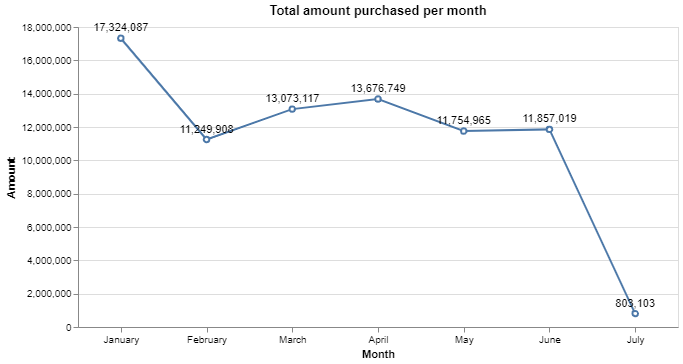

In [8]:
#A line chart can show the total amount values by month.
line_chart=alt.Chart(dfMonthAmount).mark_line(
    point={"filled": False, "fill": "white"}).encode(
    x=alt.X('month:N', axis=alt.Axis(labelAngle=0), 
            sort=['January', 'February', 'March', 'April', 'May', 'June', 'July'],
            title='Month'), 
    y=alt.Y('TransactionAmt:Q', title='Amount'))

text_chart=line_chart.mark_text(dx=0, dy=-10, align='center').encode(text=alt.Text('TransactionAmt:Q', format=',.0f'))

(line_chart + text_chart).properties(height=300, width=600, title='Total amount purchased per month')

The line chart shows the values sold in the dataset transactions for all available data (January to the beginning of July). 

In [9]:
#Grouping the data in fraud and non-fraud to check the data balance.
transGroup = fraudPD[['isFraud','TransactionID']].groupby(['isFraud'], dropna=False).agg('count').reset_index()
transGroup.columns = ['isFraud','count']

### Total count of transactions <a class="anchor" id="CountOfTransactions"></a>

[TOC](#top)

One vital piece of information to visualize is the count of dataset purchases. It's a way to verify the imbalance of the data. It is one crucial aspect related to the problem of fraud detection. The fraud dataset is usually formed by a majority legitimate amount of transactions and a minority fraudulent amount of transactions. In this case, there are almost 570 thousand legitimate transactions with around 20 thousand fraudulent transactions. Transactions means purchases of products or services.

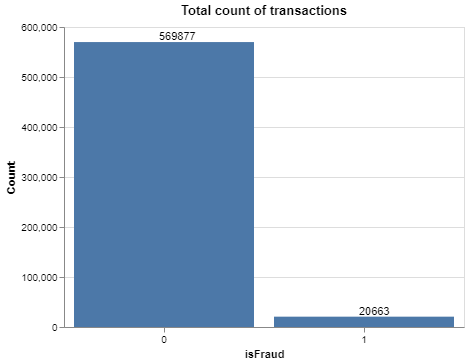

In [10]:
#Implementing a bar chart to check the data balance as fraud and non-fraud visually.
bar_chart=alt.Chart(transGroup).mark_bar().encode(
    alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)), 
    alt.Y('count:Q', title='Count'))
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Total count of transactions')

The data is very unbalanced, and it must be balanced before presenting it to a machine-learning model.

Grouping by product code, the product for each transaction. Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.

In [11]:
productCDGroup = fraudPD[['ProductCD','TransactionID']].groupby(['ProductCD'], dropna=False).agg('count').reset_index()
productCDGroup.columns = ['ProductCD','count']

### Product transaction distribution <a class="anchor" id="ProductDistribution"></a>

[TOC](#top)

Another exciting piece of information is about the count of products purchased. The dataset has just five products purchased. According to the information in the Kaggle, this field stores some product codes (C, H, R, S, and W). Those are the products of each transaction. The product doesn't necessarily have to be genuine (like one item to be added to the shopping cart). It could be any service. One can verify that product code W has the highest number of purchases, with almost 440 thousand. The other four products have lower than 70 thousand counts purchased. 

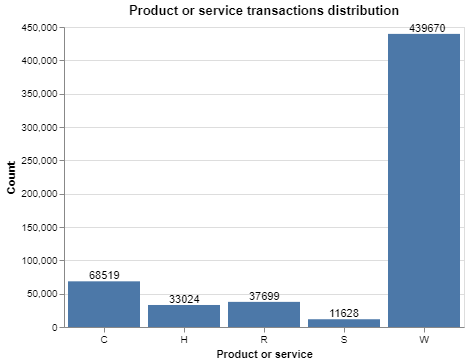

In [12]:
bar_chart=alt.Chart(productCDGroup).mark_bar().encode(
    alt.X('ProductCD:N', axis=alt.Axis(labelAngle=0), title='Product or service'), 
    alt.Y('count:Q', title='Count'))
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-15).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Product or service transactions distribution')

The bar chart illustrates the dataset distribution of product types.

In [13]:
#Grouping the data according to the card types.
card4Group = fraudPD[['card4','TransactionID']].groupby(['card4'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','count']

### Cards brands distribution <a class="anchor" id="BrandsDistribution"></a>

[TOC](#top)

One can see how the data is distributed regarding the card brands. The dataset has four brands: American Express, Discover, Mastercard and Visa. It is possible to verify the Visa brand's dominance of purchases, with almost 400 thousand purchases. The Mastercard brand follows it with nearly 190 thousand purchases. American Express has around 8 thousand purchases, and Discover has over 6 thousand.

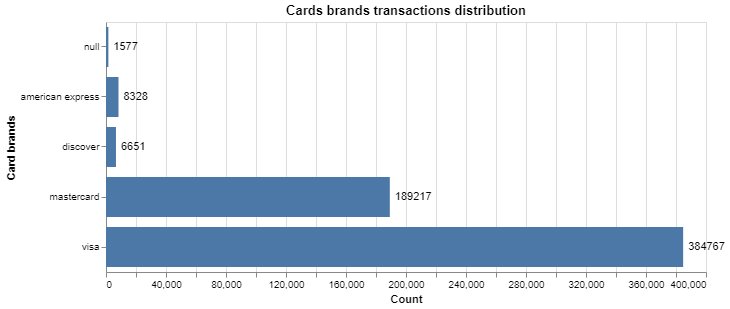

In [14]:
#The bar chart presents the amount of each credit card brand used in the transactions.
bar_chart=alt.Chart(card4Group).mark_bar(size=40).encode(
    x=alt.X('count:Q', title='Count'),
    y=alt.Y('card4:N', title='Card brands'))
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600, title='Cards brands transactions distribution')

In [15]:
#Grouping and counting the transactions according to credit card types.
card6Group = fraudPD[['card6','TransactionID']].groupby(['card6'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','count']

### Cards Types distribution <a class="anchor" id="BrandsTDistribution"></a>

[TOC](#top)

There are two main ways to purchase using a card: debit or credit. The dataset has a third way called charge, but it has just 15 purchases in total. Debit cards have the highest number of purchases, with almost 440 thousand. It is followed by credit cards with nearly 150 thousand purchases. This information is fascinating because it shows the domain of debit purchases instead of credit purchases. 

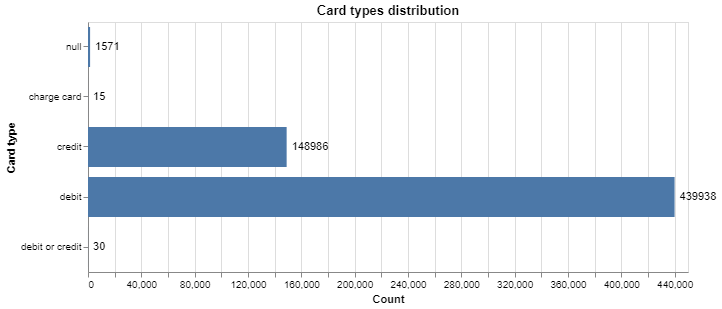

In [16]:
#Visually presenting the amount of transactions according to credit card type.
bar_chart=alt.Chart(card6Group).mark_bar(size=40).encode(
    x=alt.X('count:Q', title='Count'),
    y=alt.Y('card6:N', title='Card type'))
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600, title='Card types distribution')

In [17]:
#Grouping the transactions by credit brand and transaction type (genuine or fraudulent).
card4Group = fraudPD[['card4','TransactionID','isFraud']].groupby(['card4','isFraud'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','isFraud','count']

### Cards brands distribution by transaction type <a class="anchor" id="DistributionBTType"></a>

[TOC](#top)

One can verify the count of brand purchases by considering the type of transaction (legitimate-0 or fraudulent-1). The Visa card is the most used, with over 370 thousand legitimate 13 thousand fraudulent transactions. Mastercard follows it with around 180 thousand transactions and almost 6500 fraudulent transactions. It is possible to conclude that the number of fraudulent transactions is unrelated to a specific card brand because the amount of fraudulent transactions is around 3.5% for both Visa and Mastercard.

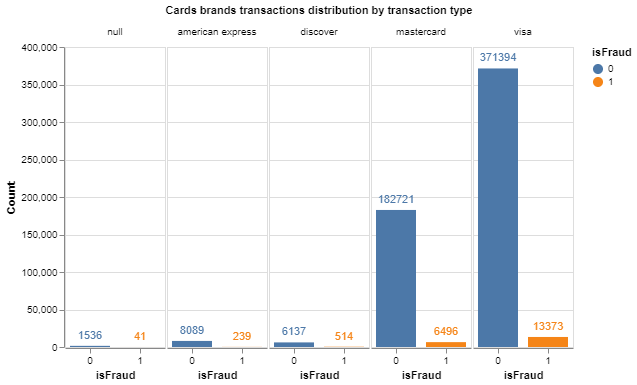

In [18]:
#Let's visually check the number of credit-type transactions that are fraudulent or genuine.
bar_chart = alt.Chart(card4Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q", title='Count'),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card4:N", title='Cards brands transactions distribution by transaction type')
).configure_facet(spacing=0)


In [19]:
#Let's group the transactions by card type (credit or debit) divided by fraudulent or legitimate transactions.
card6Group = fraudPD[['card6','TransactionID','isFraud']].groupby(['card6','isFraud'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','isFraud','count']

### Cards distribution by transaction type <a class="anchor" id="DistributionTType"></a>

[TOC](#top)

The following graphic presents the number of transactions (purchases) by credit card divided into legitimate-0 transactions and fraudulent-1 transactions. One can verify the domain of debit card transactions with almost 430 thousand legitimate transactions and over 10 thousand fraudulent transactions. It is followed by credit card transactions with practically 140 thousand legitimate transactions and nearly 10 thousand transactions. One can have an essential insight with this graphic: It is possible to verify that 7.15% of credit card transactions are fraudulent while only 2.5% of debit transactions are fraudulent. Fraudsters use three times more credit cards than debit cards.

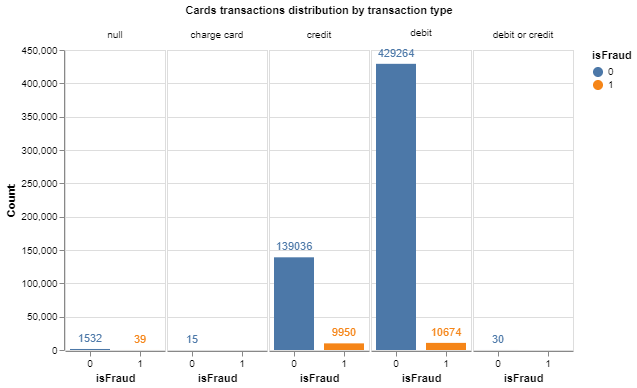

In [20]:
#One can see the distribution of transactions by card and type of transactions.
bar_chart = alt.Chart(card6Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q", title='Count'),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card6:N", title='Cards transactions distribution by transaction type')
).configure_facet(spacing=0)

In [21]:
#One exciting piece of information compares the purchase profiles of legitimate and fraudulent transactions. 
#Let's calculate the average purchase amounts by legitimate and fraudulent transactions.
tAmountdf = fraudPD[['isFraud','TransactionAmt']].groupby('isFraud').mean().reset_index()

### Average amount purchase <a class="anchor" id="AvgAmountPurchase"></a>

[TOC](#top)

The graphic shows that the average purchase amounts for fraudulent and legitimate transactions are similar. On average, 135 dollars are for legitimate transactions and 149 for fraudulent transactions. One intriguing insight with this graphic is that fraudsters usually try to simulate legitimate transactions to avoid fraudulent transaction prevention systems.

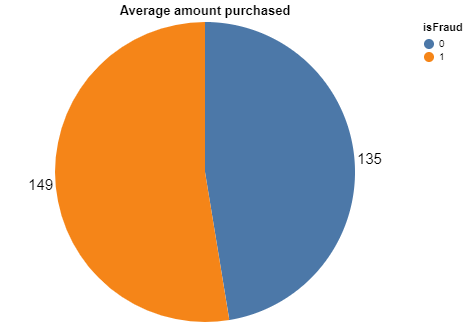

In [22]:
#One can check the purchase amount average for each kind of transaction.
pie_chart=alt.Chart(tAmountdf).mark_arc(outerRadius=150).encode(
    theta=alt.Theta("TransactionAmt:Q", stack=True),
    color=alt.Color("isFraud:N"))

bar_text = pie_chart.mark_text(radius=165, size=15,fill= "black").encode(text=alt.X('TransactionAmt:Q', format=".0f"))

(pie_chart + bar_text).properties(title='Average amount purchased')

In [23]:
#Let's unpivot a wide to long format fraud data frame to have P_emaildomain and R_emaildomain as columns.
fraudMelt=pd.melt(fraudPD[['TransactionID','P_emaildomain','R_emaildomain']], 
                  id_vars=['TransactionID'], 
               value_vars=['P_emaildomain', 'R_emaildomain'], ignore_index=False)

#So, one can count how many domains are present in the transactions.
fraudMelt=fraudMelt[['variable','value']].value_counts().reset_index()
fraudMelt.columns = ['address','domain','count']

#Then, one can count how many transactions for the first five domain addresses.
fraudGrp = fraudMelt[['domain','count']].groupby('domain').sum().sort_values('count', ascending=False).head(5)
fraudMelt=fraudMelt.merge(fraudGrp, how='inner', on='domain')[['address','domain','count_x']]
fraudMelt.columns = ['address','domain','count']

### Purchase distribution by email address <a class="anchor" id="DistrByEmailAddress"></a>

[TOC](#top)

Most purchases and recipients have an email domain. Therefore, verifying how such domains distribute the number of transactions is insightful. The following graphic presents the distribution of email domains for purchasers and recipients. One can see that the primary email domain used is gmail.com, with almost 230 thousand transactions to purchase a domain and nearly 60 thousand transactions for the recipient domain, followed by yahoo.com and hotmail.com. Certain transactions don't need a recipient, so such domains are null.

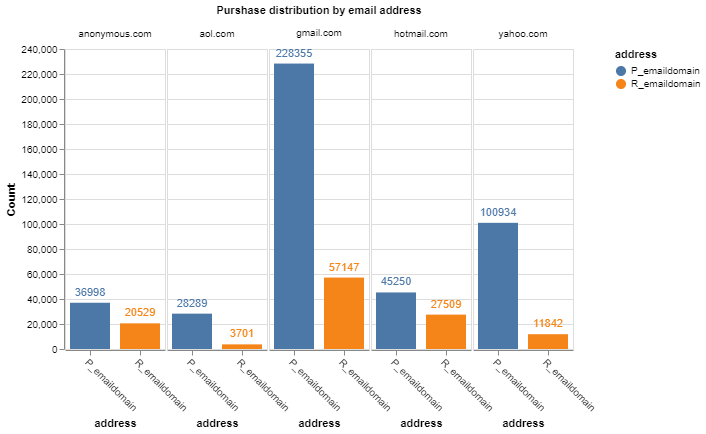

In [24]:
#Let's see the graphic of the email domain address distribution for purchasers and recipients
bar_chart = alt.Chart(fraudMelt).encode(
    alt.X("address:O", axis=alt.Axis(labelAngle=45)),
    alt.Y("count:Q", title='Count'),
    alt.Color("address:N"),
    alt.Text("count:Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("domain:N", title='Purshase distribution by email address')
).configure_facet(spacing=0)

### Handling Missing Values  <a class="anchor" id="HMissingValues"></a>

[TOC](#top)

The dataset in the analysis has 394 fields with relevant information about card transactions (purchases). Unfortunately, several fields are formed by thousands of missing values. So far, The strategy chosen to deal with the missing values is to drop them. Fortunately, the remaining fields are far enough to continue the analysis and to perform data balance and ML classification.

In [44]:
#Let's drop the null values for now. I need to understand the data better to fill the null values with information.
notnaFraud=fraudPD[['isFraud',
                'TransactionAmt',
                'ProductCD',
                'card1',
                'card4',
                'card6',
                'addr1',
                'addr2',
                'P_emaildomain',
                'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                'V95', 'V96', 'V97','V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
                'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126' , 'V127',
                'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']].dropna()

In [45]:
#How many rows and columns does my not null data have?
notnaFraud.shape

(431291, 66)

In [46]:
#Now, we have no null values in the data to present to a machine learning model.
notnaFraud.isna().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card4             0
                 ..
V133              0
V134              0
V135              0
V136              0
V137              0
Length: 66, dtype: int64

In [47]:
notnaFraud.shape

(431291, 66)

One can count the remaining data after dropping the missing values. The dataset has over 420 thousand legitimate transactions and over 10 thousand fraudulent transactions. The remaining data is enough to apply ML techniques for fraud detection or classification. 

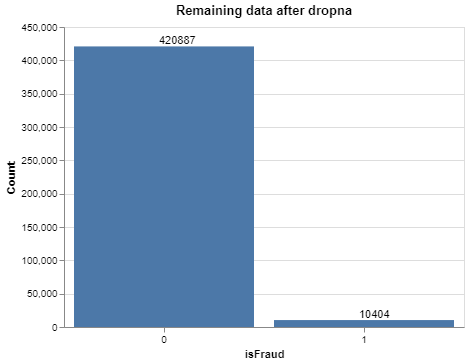

In [48]:
#After dropping the null values, this data is available to the machine learning model. 
#It is still an excellent amount of data.
bar_chart = alt.Chart(notnaFraud[['isFraud']].value_counts().reset_index().rename(columns={0:'counts'})).mark_bar().encode(
    y=alt.Y('counts:Q', title='Count'),
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)))
bar_chart
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='counts:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Remaining data after dropna')

### Features correlation  <a class="anchor" id="FeaturesCorrelation"></a>

[TOC](#top)

The following heat map shows the correlation among the most relevant independent variables. The highest correlation is between ProductCD and card6, but even in this case the correlation is low (-0.39). High positive correlation value is near 1.0 and high negative correlation value is near -1.0. The selected fields are not highly correlated.

In [70]:
#The machine learning model accepts numerical data. Therefore, it is necessary to factorize the categorical data.
factFraud=notnaFraud[['ProductCD','card4','card6','P_emaildomain']].apply(lambda x : pd.factorize(x)[0])

In [71]:
factFraud=pd.concat([notnaFraud[['TransactionAmt',
                             'card1',
                             'addr1',
                             'addr2']].reset_index(drop=True), factFraud.reset_index(drop=True)], axis=1) 

<Axes: >

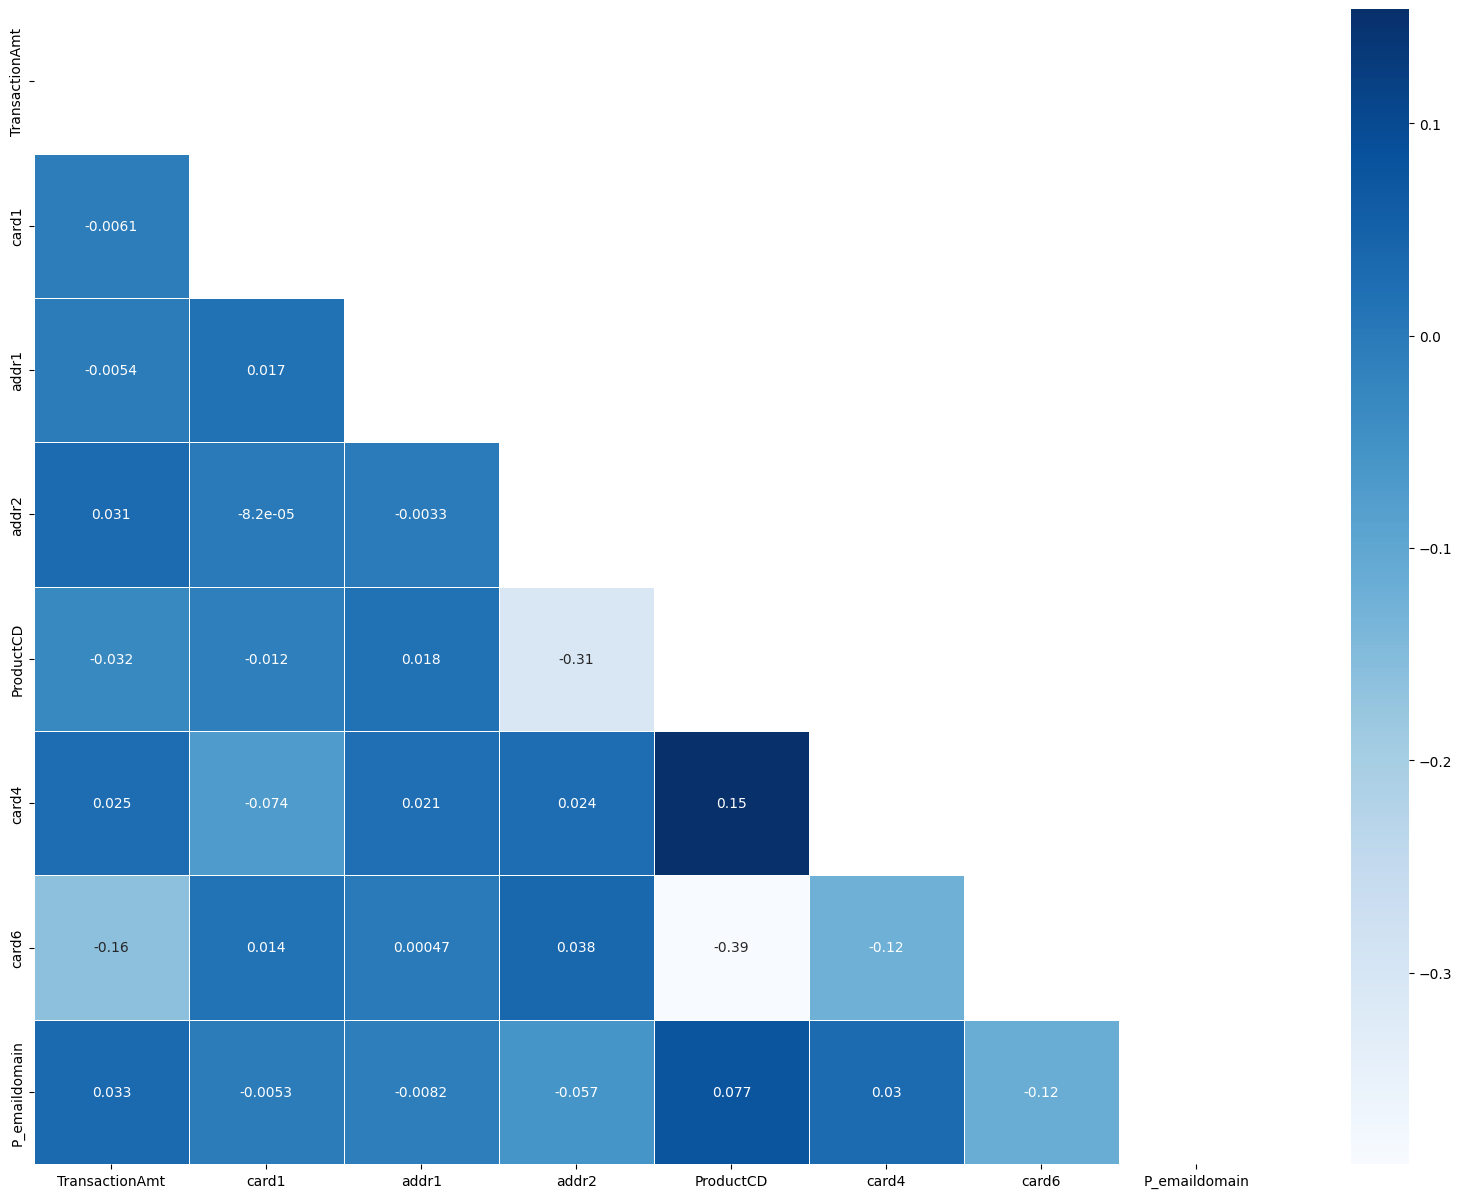

In [73]:
#Let's draw the heatmap to verify the correlation between the independent variables. 
#It is vital to know the behavior of the data used in the Machine Learning model.
fcorr = factFraud[['TransactionAmt',
                             'card1',
                             'addr1',
                             'addr2','ProductCD','card4','card6','P_emaildomain']]
plt.subplots(figsize=(20,15))
sns.heatmap(fcorr.corr(), 
            cmap="Blues", 
            annot=True, 
            linewidths=.5, 
            mask=np.triu(fcorr.corr()))

### Dummy Variables  <a class="anchor" id="dummyvar"></a>

[TOC](#top)

There are four categorical fields in the analyzed dataset. Therefore, it is necessary to create dummy variables with them. Each field was converted into as many 0 and 1 variables as there are different values. The columns in the output were named according to the values in the original fields and prepended to the field's values. For now, It was considered just three fields. The P_emaildomain field will be included in a further version of the project. 

In [97]:
dummyFraud=pd.get_dummies(notnaFraud[['ProductCD','card4','card6']], drop_first=True)

In [80]:
#Let's concatenate the original numerical data with the factorized categorical data.
fraud=pd.concat([notnaFraud[['isFraud',
                             'TransactionAmt',
                             'card1',
                             'addr1',
                             'addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                             'V95', 'V96', 'V97','V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 
                             'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
                             'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 
                             'V123', 'V124', 'V125', 'V126' , 'V127',
                             'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']].reset_index(drop=True), 
                             dummyFraud.reset_index(drop=True)], axis=1)


In [82]:
X=fraud[['TransactionAmt','card1','addr1','addr2',
        'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
        'V95', 'V96', 'V97','V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
        'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126' , 'V127',
        'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']]

y=fraud['isFraud']

### Data balancing  <a class="anchor" id="dataBalancing"></a>

[TOC](#top)

The imbalanced datasets are a characteristic of the problem of credit card fraud detection. One can see that the fraud dataset is imbalanced. The issue presents much more legitimate transactions than fraudulent transactions. It is not different in this case, so we must use a technique to balance the data. As the quantity of data is enough, one can use the under-sampling technique. After this process, the remaining data has over 10 thousand legitimate and fraudulent transactions.

In [83]:
#Let's perform an undersampling to balance the data. In this case, it was used a technique of random sampling with replacement.
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

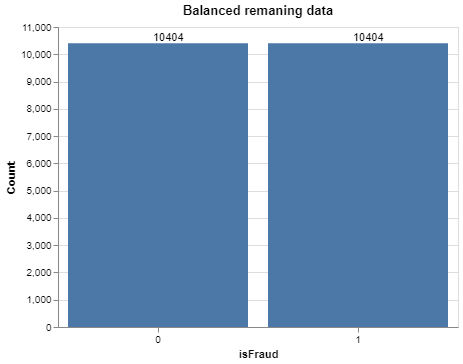

In [84]:
#Let's visually see the balanced data in a simple bar chart.
bar_chart = alt.Chart(y_rus.value_counts().reset_index().rename(columns={0:'counts'})).mark_bar().encode(
    y=alt.Y('isFraud:Q', title='Count'),
    x=alt.X('index:N', axis=alt.Axis(labelAngle=0), title='isFraud'))
bar_chart
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='isFraud:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Balanced remaning data')

Now, the two classes (legitimate and fraudulent) are balanced.

### Feature Selection  <a class="anchor" id="featureSelection"></a>

[TOC](#top)

Once the data is balanced, one can perform feature selection. For this task, one chose the Recursive feature elimination with cross-validation to select features. This technique performs recursive feature elimination in a cross-validation loop to find the optimal number of features. Given an external estimator that assigns weights to features, recursive feature elimination aims to select features by recursively considering smaller and smaller sets of features. First, it trains the estimator on the initial set of features, and each feature's importance is obtained either through any specific attribute or callable. Then, it prunes the most minor essential features from the current features. That procedure is recursively repeated on the pruned set until it reaches the desired number of features.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus,
                                                    test_size=0.2, 
                                                    random_state=42)

In [89]:

min_features_to_select = 1  # Minimum number of features to consider
clf = RandomForestClassifier(n_estimators=10, 
                             random_state=42)  

cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 13


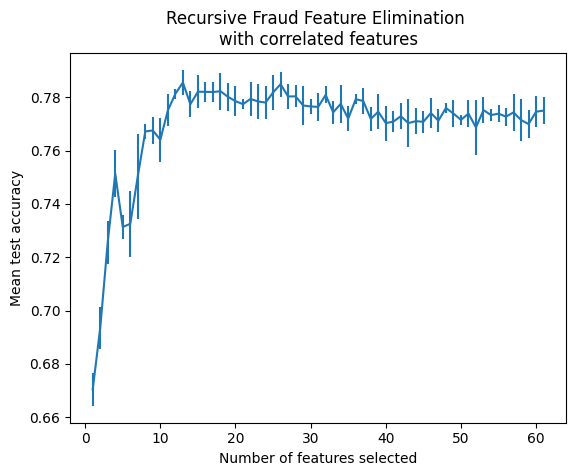

In [90]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Fraud Feature Elimination \nwith correlated features")
plt.show()

## Fraud classification <a class="anchor" id="classification"></a>

[TOC](#top)

This section presents some baseline models to set the stage for advanced modeling in the future project step. One can see the performance of four models: Decision Trees, Random Forests, Adaboost,  and Support Vector Machines. A feature selection is set for all models using a recursive feature elimination with cross-validation based on the Random Forests classifier. Next, a pipeline is designed with these steps: feature selection, feature scaling, model hyperparameters optimization, and training. To articulate a model evaluation, a performance metric report for each model is presented with accuracy, precision, recall, and f1-score.

### Decision trees models <a class="anchor" id="decisionTrees"></a>

[TOC](#top)

In [91]:
#this is the classifier used for feature selection
clf_featr_sele = RandomForestClassifier(n_estimators=10, 
                             random_state=42)

rfecv = RFECV(estimator=clf_featr_sele, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')

#you can have different classifier for your final classifier
clf = DecisionTreeClassifier()


CV_dt = GridSearchCV(clf, 
                      param_grid={
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2,4,6],
                          'min_samples_leaf': [1, 2]},
                      cv= 5, 
                      scoring = 'roc_auc')


pipeline  = Pipeline([('feature_sele',rfecv),
                      ('scale', StandardScaler()),
                      ('clf_cv',CV_dt)])

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2056
           1       0.77      0.70      0.73      2106

    accuracy                           0.74      4162
   macro avg       0.74      0.74      0.74      4162
weighted avg       0.74      0.74      0.74      4162



The Decision Trees performance was:
- Accuracy equals to 74%. 
- Precision equals 72% for legitimate class and 77% for fraudulent class.
- Recall equals 78% for genuine class and 70% for fraudulent class.
- F1-score equals 75% for the genuine class and 73% for the fraudulent class.

### Random forests models<a class="anchor" id="randomForests"></a>

[TOC](#top)

In [92]:
#this is the classifier used for feature selection
clf_featr_sele = RandomForestClassifier(n_estimators=10, 
                             random_state=42)

rfecv = RFECV(estimator=clf_featr_sele, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')

#you can have different classifier for your final classifier
clf = RandomForestClassifier(n_estimators=10, 
                             random_state=42,
                             class_weight="balanced") 
CV_rfc = GridSearchCV(clf, 
                      param_grid={'max_depth':[2,3]},
                      cv= 5, scoring = 'roc_auc')


pipeline  = Pipeline([('feature_sele',rfecv),
                      ('scale', StandardScaler()),
                      ('clf_cv',CV_rfc)])

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      2056
           1       0.76      0.65      0.70      2106

    accuracy                           0.72      4162
   macro avg       0.73      0.72      0.72      4162
weighted avg       0.73      0.72      0.72      4162



The Random Forests performance was:
- Accuracy equals to 72%. 
- Precision equals 68% for the legitimate class and 78% for the fraudulent class.
- Recall equals 82% for genuine class and 63% for fraudulent class.
- F1-score equals 74% for the genuine class and 69% for the fraudulent class.

### AdaBoost model <a class="anchor" id="AdaBoost"></a>

[TOC](#top)

In [93]:
#this is the classifier used for feature selection
clf_featr_sele = RandomForestClassifier(n_estimators=10, 
                             random_state=42)

rfecv = RFECV(estimator=clf_featr_sele, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')

#you can have different classifier for your final classifier
DTC = DecisionTreeClassifier(class_weight = "balanced")
clf = AdaBoostClassifier()

CV_rfc = GridSearchCV(clf, 
                      param_grid = {
                          'estimator':[DTC],
                          'learning_rate': [0.1, 0.5],
                          'n_estimators': [10, 20]},
                      cv= 5, 
                      scoring = 'roc_auc')


pipeline  = Pipeline([('feature_sele',rfecv),
                      ('scale', StandardScaler()),
                      ('clf_cv',CV_rfc)])

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2056
           1       0.77      0.77      0.77      2106

    accuracy                           0.77      4162
   macro avg       0.77      0.77      0.77      4162
weighted avg       0.77      0.77      0.77      4162



The Adaboost performance was:
- Accuracy equals to 77%. 
- Precision equals 77% for the legitimate class and 77% for the fraudulent class.
- Recall equals 75% for genuine class and 79% for fraudulent class.
- F1-score equals 76% for the genuine class and 78% for the fraudulent class.


### Suport Vector Machines model <a class="anchor" id="SVM"></a>

[TOC](#top)

In [94]:
#this is the classifier used for feature selection
clf_featr_sele = RandomForestClassifier(n_estimators=10, 
                             random_state=42)

rfecv = RFECV(estimator=clf_featr_sele, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')

#you can have different classifier for your final classifier
clf = svm.SVC()

CV_rfc = GridSearchCV(clf, 
                      param_grid={'C':[0.1, 1.0, 10],
                                  'kernel':['linear','rbf']},
                      cv= 5, 
                      scoring = 'roc_auc')


pipeline  = Pipeline([('feature_sele',rfecv),
                      ('scale', StandardScaler()),
                      ('clf_cv',CV_rfc)])

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      2056
           1       0.77      0.64      0.70      2106

    accuracy                           0.72      4162
   macro avg       0.73      0.73      0.72      4162
weighted avg       0.73      0.72      0.72      4162



The Support Vector Machines performance was:
- Accuracy equals to 74%. 
- Precision equals 70% for the legitimate class and 80% for the fraudulent class.
- Recall equals 83% for genuine class and 66% for fraudulent class.
- F1-score equals 76% for the genuine class and 72% for the fraudulent class.

## Conclusions <a class="anchor" id="conclusions"></a>

[TOC](#top)

The data was investigated by checking for data unbalancing, visualizing the features, checking the null values, and understanding the relationship between different features. The data were split into train and test sets and scaled, and a feature selection technique based on feature importance was employed and evaluated for use in further pipelines. The hyperparameters were prepared for optimization, and a pipeline was created for each model with feature selection, scaling, hyperparameters tunning, and classification steps. The performance of Decision Trees, Random Forests, and Support Vector Machines are very similar. However, Adaboost ensemble machine learning models present the general best performance compared to all analyzed models. Another work that will be completed in the future is using neural nets to see if we could further improve the model results.